<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B7%5D_ER_cHB_ANN_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude ER Data ML 111020.csv')
Oil_ER = data['Bio-crude Oil ER']
Features = data.drop('Bio-crude Oil ER', axis = 1)

# Success
print ("Bio-crude ER dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

# data[:240:30]


Bio-crude ER dataset has 130 data points with 8 variables each.


(130, 8)

In [10]:
# TODO: Minimum price of the data
minimum_Oil_ER = np.min(Oil_ER)

# TODO: Maximum price of the data
maximum_Oil_ER = np.max(Oil_ER)

# TODO: Mean price of the data
mean_Oil_ER = np.mean(Oil_ER)

# TODO: Median price of the data
median_Oil_ER = np.median(Oil_ER)

# TODO: Standard deviation of prices of the data
std_Oil_ER = np.std(Oil_ER)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil ER:{: .2f} %".format(minimum_Oil_ER))
print("Maximum bio-crude oil ER:{: .2f} %".format(maximum_Oil_ER))
print("Mean bio-crude oil ER:{: .2f} %".format(mean_Oil_ER))
print("Median bio-crude oil ER:{: .2f} %".format(median_Oil_ER))
print("Standard deviation of bio-crude oil ER:{: .2f} %".format(std_Oil_ER))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil ER: 2.50 %
Maximum bio-crude oil ER: 92.00 %
Mean bio-crude oil ER: 43.97 %
Median bio-crude oil ER: 45.20 %
Standard deviation of bio-crude oil ER: 19.91 %


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.077692,25.000000,18.858462,8.073846,19.490000,8.094615,6.849231,43.970769
std,19.042308,26.912396,27.227704,16.668829,26.616579,14.239008,11.152323,19.988467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000
50%,1.700000,18.350000,0.000000,0.000000,9.900000,0.000000,2.450000,45.200000
75%,12.175000,44.550000,37.325000,7.975000,27.600000,13.975000,7.150000,58.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,92.000000


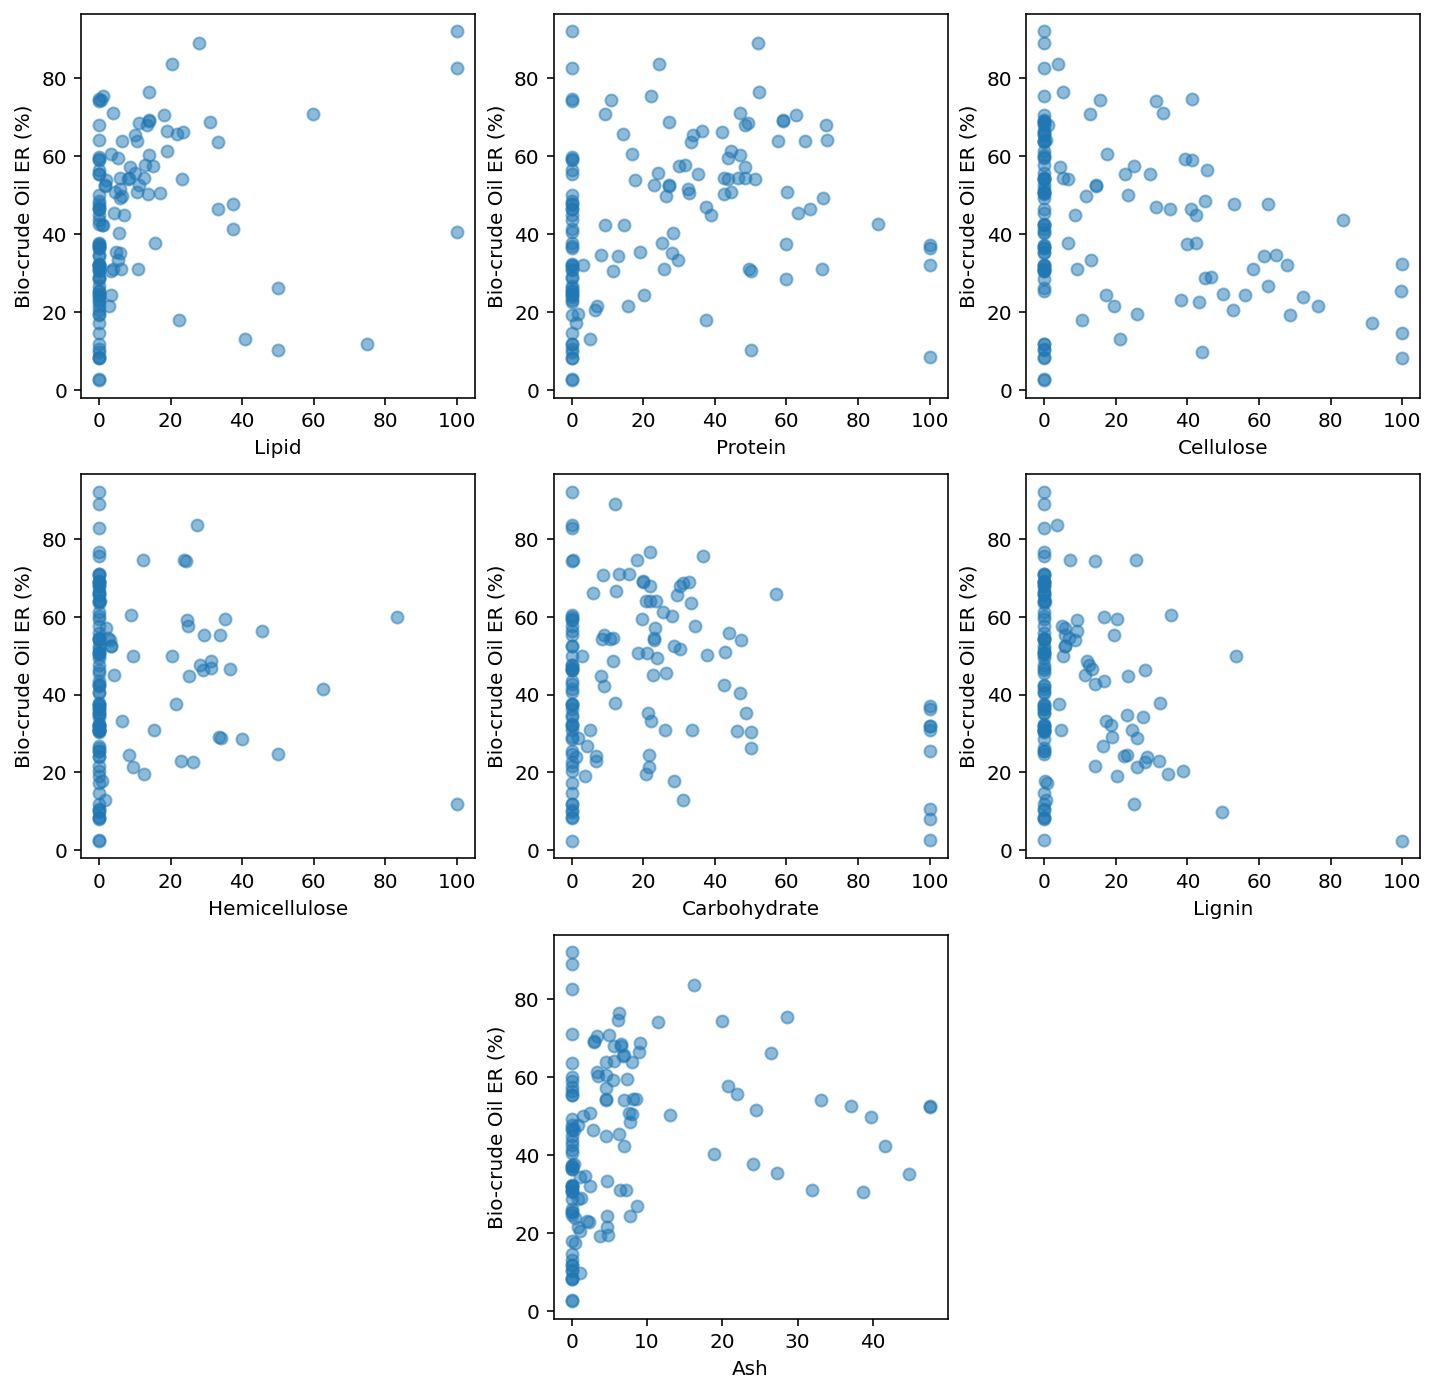

In [11]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Protein'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Ash'],data['Bio-crude Oil ER'],alpha = 0.5)
plt.show()

(array([2., 0., 0., 3., 3., 3., 1., 0., 2., 2., 3., 3., 5., 2., 3., 7., 5.,
        3., 4., 5., 0., 3., 4., 3., 4., 3., 6., 5., 6., 3., 4., 3., 4., 0.,
        4., 4., 3., 3., 3., 0., 4., 1., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([ 2.5 ,  4.29,  6.08,  7.87,  9.66, 11.45, 13.24, 15.03, 16.82,
        18.61, 20.4 , 22.19, 23.98, 25.77, 27.56, 29.35, 31.14, 32.93,
        34.72, 36.51, 38.3 , 40.09, 41.88, 43.67, 45.46, 47.25, 49.04,
        50.83, 52.62, 54.41, 56.2 , 57.99, 59.78, 61.57, 63.36, 65.15,
        66.94, 68.73, 70.52, 72.31, 74.1 , 75.89, 77.68, 79.47, 81.26,
        83.05, 84.84, 86.63, 88.42, 90.21, 92.  ]),
 <a list of 50 Patch objects>)

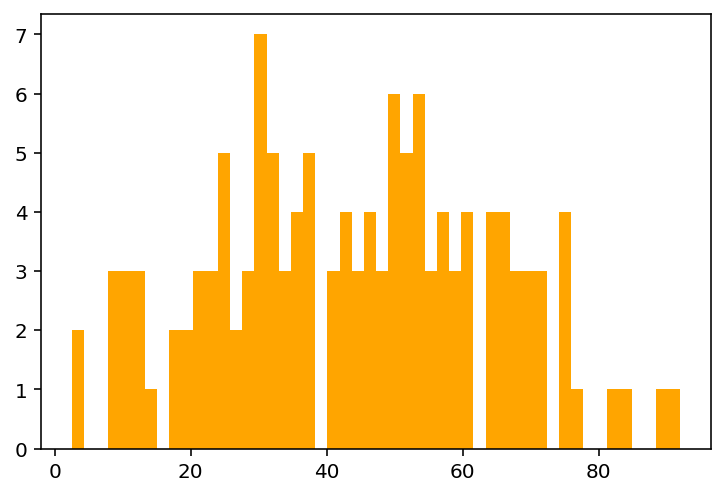

In [12]:
plt.hist(data['Bio-crude Oil ER'],bins=50,color='orange')

(array([66.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

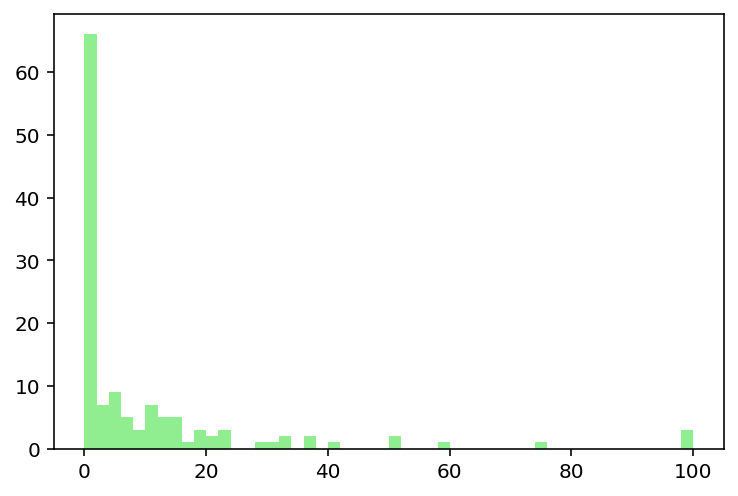

In [13]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


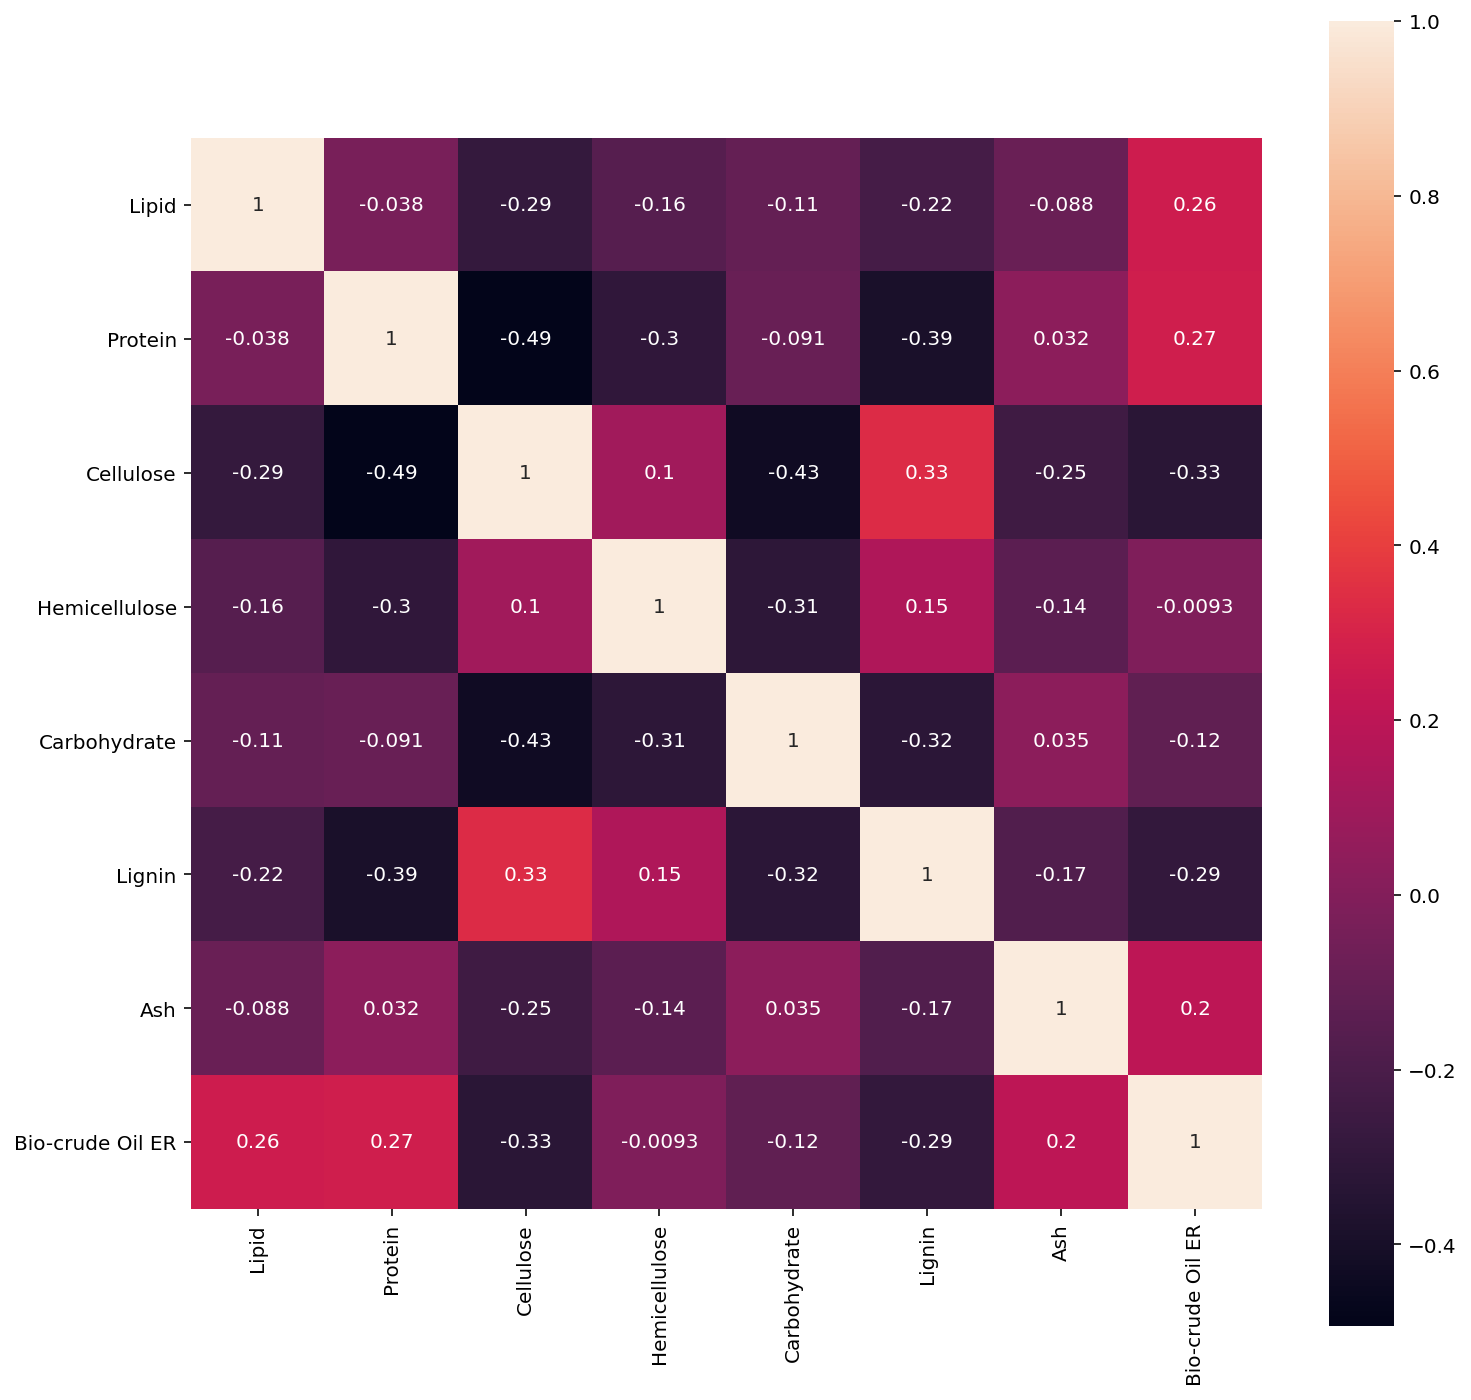

In [14]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [15]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use now.
#written by Wenjing.
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# Lets split the data into 10 folds. 
from sklearn.model_selection import KFold
kf =KFold(n_splits=10, shuffle=True, random_state=262)

# R2_all=[]
mape_all=[]
mape_train_all=[]
mape_rfr_all=[]
y_test_list=[]
y_pred_list=[]
for train_index, test_index in kf.split(Features, Oil_Yields):
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    #random forest regressor
    rfr=RandomForestRegressor(max_depth=4, n_estimators=100,random_state=262).fit(X_train, y_train)
    y_pred_rfr=rfr.predict(X_test)
    mape_rfr=mean_absolute_percentage_error(y_test, y_pred_rfr)
    mape_rfr_all.append(mape_rfr)
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(random_state=262, hidden_layer_sizes=(100,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True).fit(X_train, y_train)
    y_pred=mlpr.predict(X_test)
#     R2=regr.score(X_test, y_test)
#     R2_all.append(R2)
    mape=mean_absolute_percentage_error(y_test, y_pred) #test error
    mape_all.append(mape) #test error for all folds
    mape_train=mean_absolute_percentage_error(y_train, mlpr.predict(X_train)) #training error
    mape_train_all.append(mape_train) #training error for all folds
    
    y_test_list.append(y_test.values)
    y_pred_list.append(y_pred)
    
print("MAPE (test) from MLP",mape_all)
print("MAPE (train) from MLP",mape_train_all)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)
# print("y_true", y_test_all)
# print("y_pred", y_pred_all)

In [16]:
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(100,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)

    # Predict training set and test set
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 14.622980291355711
Standard deviation of MAE of training set 3.384688944847906
Mean value of MAE of test set 16.773679967277854
Standard deviation of MAE of test set 2.034617358956131

Mean value of RMSE of training set 18.14270775623316
Standard deviation of RMSE of training set 3.889484564139701
Mean value of RMSE of test set 20.73428604994266
Standard deviation of RMSE of test set 3.15283028678093

Mean value of R2 of training set 0.13555375567739403
Standard deviation of R2 of training set 0.3383537670231368
Mean value of R2 of test set -0.10635597782008074
Standard deviation of R2 of test set 0.1827087158341947

Mean value of MRE of training set 0.3321499084846356
Standard deviation of MRE of training set 0.07559640771753622
Mean value of MRE of test set 0.3803288351388545
Standard deviation of MRE of test set 0.029894172446908424


Text(0.5, 1.0, 'y_pred vs. y_true')

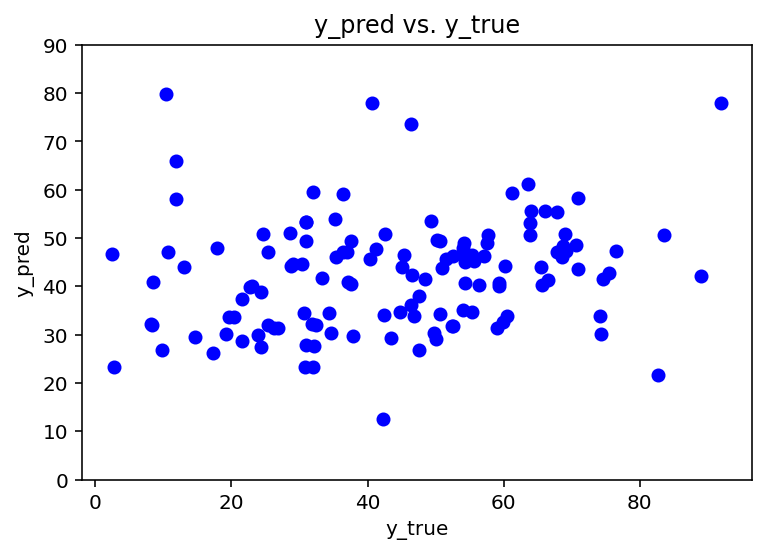

In [17]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [18]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_ANN.csv', index = False, header=True)

In [19]:
# hidden_layer_sizes 参数的最佳取值(1, 201, 1)

for i in range(1, 201, 1):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(i,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1
Mean value of R2 of training set -4.904371574518269
Standard deviation of R2 of training set 0.7438899277596683
Mean value of R2 of test set -5.170379275006534
Standard deviation of R2 of test set 1.4384876825427548


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2
Mean value of R2 of training set -1.5274269789271866
Standard deviation of R2 of training set 1.7958317982060887
Mean value of R2 of test set -1.7112924005908559
Standard deviation of R2 of test set 1.9196326675289173


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3
Mean value of R2 of training set -0.07041723548073048
Standard deviation of R2 of training set 0.1885524677569064
Mean value of R2 of test set -0.23437549242306632
Standard deviation of R2 of test set 0.21430672128442133


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4
Mean value of R2 of training set -0.2065384958303758
Standard deviation of R2 of training set 0.3571550444863824
Mean value of R2 of test set -0.24875246106213295
Standard deviation of R2 of test set 0.5730145499482044


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5
Mean value of R2 of training set -0.3772326117591343
Standard deviation of R2 of training set 0.6906762542848818
Mean value of R2 of test set -0.05562697922134646
Standard deviation of R2 of test set 0.5626219893317881


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


6
Mean value of R2 of training set -0.15675972222680726
Standard deviation of R2 of training set 0.2755000672635306
Mean value of R2 of test set -0.31424295559356763
Standard deviation of R2 of test set 0.30173771235122143


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7
Mean value of R2 of training set 0.16824838802179493
Standard deviation of R2 of training set 0.11344712699872843
Mean value of R2 of test set 0.015118595617460984
Standard deviation of R2 of test set 0.1920023988349207


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


8
Mean value of R2 of training set 0.02585778930240812
Standard deviation of R2 of training set 0.2945476590158246
Mean value of R2 of test set -0.054440320271203796
Standard deviation of R2 of test set 0.2618278115367671


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


9
Mean value of R2 of training set 0.21446230835638658
Standard deviation of R2 of training set 0.04585405886014428
Mean value of R2 of test set 0.030316236359834492
Standard deviation of R2 of test set 0.3215756712922503


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


10
Mean value of R2 of training set 0.1122204542624767
Standard deviation of R2 of training set 0.1839506174037681
Mean value of R2 of test set -0.02966662902211195
Standard deviation of R2 of test set 0.1320014503406578


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


11
Mean value of R2 of training set 0.14038203886882428
Standard deviation of R2 of training set 0.1611749611533477
Mean value of R2 of test set -0.2037093368578677
Standard deviation of R2 of test set 0.5821570726494163
12
Mean value of R2 of training set 0.15853198219877151
Standard deviation of R2 of training set 0.07362147918004991
Mean value of R2 of test set 0.03461298639593871
Standard deviation of R2 of test set 0.08006945039924455


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


13
Mean value of R2 of training set -0.018834176998237
Standard deviation of R2 of training set 0.536058563679945
Mean value of R2 of test set -0.16700681142114754
Standard deviation of R2 of test set 0.4260935561001691


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


14
Mean value of R2 of training set 0.0703938934796425
Standard deviation of R2 of training set 0.12189722772162988
Mean value of R2 of test set -0.2252695759510893
Standard deviation of R2 of test set 0.37687432059045756
15
Mean value of R2 of training set 0.09853799288582657
Standard deviation of R2 of training set 0.3165075994973762
Mean value of R2 of test set -0.1772323247168137
Standard deviation of R2 of test set 0.42184187001835316
16
Mean value of R2 of training set 0.20788482412809248
Standard deviation of R2 of training set 0.09687686429064356
Mean value of R2 of test set 0.09930485127784733
Standard deviation of R2 of test set 0.2432812330500708


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


17
Mean value of R2 of training set 0.021071618692565464
Standard deviation of R2 of training set 0.413621857533018
Mean value of R2 of test set -0.2238759586439575
Standard deviation of R2 of test set 0.32752218757313367
18
Mean value of R2 of training set 0.13630430820054149
Standard deviation of R2 of training set 0.21541686298556634
Mean value of R2 of test set -0.04113856434141963
Standard deviation of R2 of test set 0.24512520218440856
19
Mean value of R2 of training set 0.044546964505831815
Standard deviation of R2 of training set 0.30314859643189573
Mean value of R2 of test set -0.10210565369276955
Standard deviation of R2 of test set 0.37761819234811117


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20
Mean value of R2 of training set 0.1710699022550547
Standard deviation of R2 of training set 0.05491965181669372
Mean value of R2 of test set 0.14093053903166433
Standard deviation of R2 of test set 0.29031416994146164


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


21
Mean value of R2 of training set 0.3126763469920024
Standard deviation of R2 of training set 0.13273278393028004
Mean value of R2 of test set 0.12262637965678763
Standard deviation of R2 of test set 0.18413497701696557


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


22
Mean value of R2 of training set 0.2462685263448223
Standard deviation of R2 of training set 0.19576717618152512
Mean value of R2 of test set 0.02152132089075426
Standard deviation of R2 of test set 0.15493767868382283


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


23
Mean value of R2 of training set 0.250005421191716
Standard deviation of R2 of training set 0.03362704656862913
Mean value of R2 of test set 0.1336027174029
Standard deviation of R2 of test set 0.21517418399729468


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


24
Mean value of R2 of training set 0.1972671914731019
Standard deviation of R2 of training set 0.1694319168558759
Mean value of R2 of test set 0.11965331152545347
Standard deviation of R2 of test set 0.2553103215524851


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


25
Mean value of R2 of training set 0.3177411929315206
Standard deviation of R2 of training set 0.06785406428501009
Mean value of R2 of test set 0.08715214677399197
Standard deviation of R2 of test set 0.21827046460103675
26
Mean value of R2 of training set 0.20494379350627687
Standard deviation of R2 of training set 0.22822735205032302
Mean value of R2 of test set -0.10652034774856822
Standard deviation of R2 of test set 0.5017712224791481
27
Mean value of R2 of training set 0.2514802886735856
Standard deviation of R2 of training set 0.14350406695641135
Mean value of R2 of test set 0.033092827671810154
Standard deviation of R2 of test set 0.20028884908279085


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


28
Mean value of R2 of training set 0.279987429989616
Standard deviation of R2 of training set 0.10867594103682422
Mean value of R2 of test set 0.1056637798154689
Standard deviation of R2 of test set 0.17504136972178358
29
Mean value of R2 of training set 0.22149341781309217
Standard deviation of R2 of training set 0.1387105023667685
Mean value of R2 of test set 0.03397830918800643
Standard deviation of R2 of test set 0.21428737613703353
30
Mean value of R2 of training set 0.09977770794518778
Standard deviation of R2 of training set 0.1309921839421286
Mean value of R2 of test set -0.057953309207074005
Standard deviation of R2 of test set 0.5089071660194976
31
Mean value of R2 of training set 0.2039166574051761
Standard deviation of R2 of training set 0.08428066441417352
Mean value of R2 of test set 0.06552096289852097
Standard deviation of R2 of test set 0.23817662404394277
32
Mean value of R2 of training set 0.22222346746960184
Standard deviation of R2 of training set 0.13681632163832

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


33
Mean value of R2 of training set 0.18539144057014126
Standard deviation of R2 of training set 0.40284943049907074
Mean value of R2 of test set -0.09521000523183717
Standard deviation of R2 of test set 0.3487062984947973


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


34
Mean value of R2 of training set 0.29618064802299393
Standard deviation of R2 of training set 0.13913509829454096
Mean value of R2 of test set 0.05065297487151263
Standard deviation of R2 of test set 0.2501023094789883
35
Mean value of R2 of training set 0.17311116680060298
Standard deviation of R2 of training set 0.060665150731542446
Mean value of R2 of test set 0.03197018660014017
Standard deviation of R2 of test set 0.3603841860411373
36
Mean value of R2 of training set 0.19889095178739424
Standard deviation of R2 of training set 0.16739217264831877
Mean value of R2 of test set 0.029987709479689456
Standard deviation of R2 of test set 0.10159456411573659


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


37
Mean value of R2 of training set 0.1422297176949128
Standard deviation of R2 of training set 0.21544392647508948
Mean value of R2 of test set 0.008481157576784581
Standard deviation of R2 of test set 0.17499227692529398


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


38
Mean value of R2 of training set -0.020633119694476593
Standard deviation of R2 of training set 0.43369743864625343
Mean value of R2 of test set -0.19137627252220926
Standard deviation of R2 of test set 0.565592775798656


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


39
Mean value of R2 of training set 0.2973282763329896
Standard deviation of R2 of training set 0.16270195584111377
Mean value of R2 of test set 0.12647858721277325
Standard deviation of R2 of test set 0.24431653206348797
40
Mean value of R2 of training set 0.05866344237184473
Standard deviation of R2 of training set 0.3161851448855476
Mean value of R2 of test set -0.13136028663254315
Standard deviation of R2 of test set 0.348503110489989
41
Mean value of R2 of training set 0.23604368570212483
Standard deviation of R2 of training set 0.16786371382993326
Mean value of R2 of test set 0.07544770834351927
Standard deviation of R2 of test set 0.1854449207497804
42
Mean value of R2 of training set 0.197411850259976
Standard deviation of R2 of training set 0.23269476719881488
Mean value of R2 of test set 0.02140953241955096
Standard deviation of R2 of test set 0.33437069912184114
43
Mean value of R2 of training set 0.23551872205291113
Standard deviation of R2 of training set 0.139503728205053

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


46
Mean value of R2 of training set 0.3339249379545053
Standard deviation of R2 of training set 0.05818441330260085
Mean value of R2 of test set 0.09916706187445937
Standard deviation of R2 of test set 0.22570577834923594


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


47
Mean value of R2 of training set -0.06307876602325474
Standard deviation of R2 of training set 0.8417984703334904
Mean value of R2 of test set -0.23544394603979754
Standard deviation of R2 of test set 0.7033527958167954
48
Mean value of R2 of training set -0.07846064584935336
Standard deviation of R2 of training set 0.29379802826566925
Mean value of R2 of test set -0.15160303459984611
Standard deviation of R2 of test set 0.20563423342869128


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


49
Mean value of R2 of training set 0.3211659286137106
Standard deviation of R2 of training set 0.22883741115879444
Mean value of R2 of test set 0.03668123596211981
Standard deviation of R2 of test set 0.27579788450755643
50
Mean value of R2 of training set 0.14732688958315532
Standard deviation of R2 of training set 0.3216676486403647
Mean value of R2 of test set -0.06541288298586515
Standard deviation of R2 of test set 0.35410077713900184
51
Mean value of R2 of training set 0.2311891641574235
Standard deviation of R2 of training set 0.04395385956332118
Mean value of R2 of test set 0.1404783123425324
Standard deviation of R2 of test set 0.3026319055976709


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


52
Mean value of R2 of training set 0.38180466194317053
Standard deviation of R2 of training set 0.09690172106657033
Mean value of R2 of test set 0.10377977701633859
Standard deviation of R2 of test set 0.25666711854337265
53
Mean value of R2 of training set 0.0873479697793001
Standard deviation of R2 of training set 0.28826940001533424
Mean value of R2 of test set -0.014830286108892032
Standard deviation of R2 of test set 0.316935220840219
54
Mean value of R2 of training set -0.8340380321293603
Standard deviation of R2 of training set 0.7265288299061109
Mean value of R2 of test set -0.829220565202287
Standard deviation of R2 of test set 0.9771949031932257
55
Mean value of R2 of training set 0.1433733837951528
Standard deviation of R2 of training set 0.20767217184993247
Mean value of R2 of test set 0.007254158187177534
Standard deviation of R2 of test set 0.10843250254750486
56
Mean value of R2 of training set 0.15072267776713832
Standard deviation of R2 of training set 0.1450444153928

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


57
Mean value of R2 of training set 0.4297842167370316
Standard deviation of R2 of training set 0.11912840624869807
Mean value of R2 of test set 0.12088012483728133
Standard deviation of R2 of test set 0.19871792361466434
58
Mean value of R2 of training set 0.030255049151179297
Standard deviation of R2 of training set 0.3636546057840776
Mean value of R2 of test set -0.06724408726131476
Standard deviation of R2 of test set 0.29485830285385306
59
Mean value of R2 of training set 0.006067076808336791
Standard deviation of R2 of training set 0.38727927055578093
Mean value of R2 of test set -0.04114359001707982
Standard deviation of R2 of test set 0.37688353839435695
60
Mean value of R2 of training set 0.11856516393481262
Standard deviation of R2 of training set 0.12735042880080327
Mean value of R2 of test set 0.006951320698176056
Standard deviation of R2 of test set 0.4183269742267888
61
Mean value of R2 of training set 0.21429117862023878
Standard deviation of R2 of training set 0.2115734

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


62
Mean value of R2 of training set 0.18399827056951806
Standard deviation of R2 of training set 0.1854191577459326
Mean value of R2 of test set 0.1358927126120641
Standard deviation of R2 of test set 0.20753705272094644
63
Mean value of R2 of training set 0.04587985548061499
Standard deviation of R2 of training set 0.2089941903554608
Mean value of R2 of test set -0.12334149785296428
Standard deviation of R2 of test set 0.35395100666315715
64
Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.11095686584518144
Mean value of R2 of test set 0.16356949982125754
Standard deviation of R2 of test set 0.2721280983815517
65
Mean value of R2 of training set 0.04726768770265674
Standard deviation of R2 of training set 0.4031827321397281
Mean value of R2 of test set -0.23904301710497167
Standard deviation of R2 of test set 0.49111221682299266
66
Mean value of R2 of training set 0.02712113623790524
Standard deviation of R2 of training set 0.244563847130

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


67
Mean value of R2 of training set 0.15096394289574644
Standard deviation of R2 of training set 0.2089956569058174
Mean value of R2 of test set 0.019971475410281686
Standard deviation of R2 of test set 0.3432284565443764
68
Mean value of R2 of training set 0.17687143475238576
Standard deviation of R2 of training set 0.1484727040922898
Mean value of R2 of test set 0.10896940860939666
Standard deviation of R2 of test set 0.31914129468371066
69
Mean value of R2 of training set 0.01596321527263106
Standard deviation of R2 of training set 0.32558104409246513
Mean value of R2 of test set -0.06212933284685007
Standard deviation of R2 of test set 0.3066258156696208


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


70
Mean value of R2 of training set 0.10151332831700727
Standard deviation of R2 of training set 0.48441711480625355
Mean value of R2 of test set -0.15526520703958746
Standard deviation of R2 of test set 0.22255552316790878
71
Mean value of R2 of training set 0.05536900531343067
Standard deviation of R2 of training set 0.2288988929176203
Mean value of R2 of test set -0.026887025024418837
Standard deviation of R2 of test set 0.29994563014000647


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


72
Mean value of R2 of training set 0.05195987121972595
Standard deviation of R2 of training set 0.39749675293001957
Mean value of R2 of test set -0.11093412261309668
Standard deviation of R2 of test set 0.2955126109078563
73
Mean value of R2 of training set 0.3163006659250569
Standard deviation of R2 of training set 0.1722281294385829
Mean value of R2 of test set 0.04521090385673107
Standard deviation of R2 of test set 0.22352886413657969
74
Mean value of R2 of training set 0.2205322459607938
Standard deviation of R2 of training set 0.22090206412082494
Mean value of R2 of test set 0.06824536399312112
Standard deviation of R2 of test set 0.24502806201740504
75
Mean value of R2 of training set 0.2902121343905777
Standard deviation of R2 of training set 0.1819597978573742
Mean value of R2 of test set 0.017638063424538636
Standard deviation of R2 of test set 0.2766244892231612
76
Mean value of R2 of training set 0.3732321457527225
Standard deviation of R2 of training set 0.122231026613187

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


77
Mean value of R2 of training set 0.34143270384045343
Standard deviation of R2 of training set 0.13021073673569164
Mean value of R2 of test set 0.04246665183069612
Standard deviation of R2 of test set 0.32467930045423665
78
Mean value of R2 of training set 0.1726551667106033
Standard deviation of R2 of training set 0.3375745722691463
Mean value of R2 of test set -0.03964079349675942
Standard deviation of R2 of test set 0.2217664203476086


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


79
Mean value of R2 of training set 0.12937798231717865
Standard deviation of R2 of training set 0.32178387993465557
Mean value of R2 of test set -0.04355068799285461
Standard deviation of R2 of test set 0.17575148030615237
80
Mean value of R2 of training set 0.17892116465815738
Standard deviation of R2 of training set 0.24024887189912272
Mean value of R2 of test set 0.036569680596280685
Standard deviation of R2 of test set 0.30915819828784985
81
Mean value of R2 of training set 0.20629857787853575
Standard deviation of R2 of training set 0.22084910675874103
Mean value of R2 of test set -0.032811994659908694
Standard deviation of R2 of test set 0.47906178103012514
82
Mean value of R2 of training set -0.41755742897333314
Standard deviation of R2 of training set 0.47416494494349765
Mean value of R2 of test set -0.5801798237635959
Standard deviation of R2 of test set 0.6291843757939983
83
Mean value of R2 of training set 0.32869861108885357
Standard deviation of R2 of training set 0.19464

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


86
Mean value of R2 of training set 0.2584123349711709
Standard deviation of R2 of training set 0.23395251677874399
Mean value of R2 of test set 0.03123703198557723
Standard deviation of R2 of test set 0.25826332735504454


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


87
Mean value of R2 of training set 0.39582633192521754
Standard deviation of R2 of training set 0.13755713475395284
Mean value of R2 of test set 0.11285278090268164
Standard deviation of R2 of test set 0.3073741690318965
88
Mean value of R2 of training set 0.17866996009294744
Standard deviation of R2 of training set 0.12095245299145571
Mean value of R2 of test set 0.04179072589565114
Standard deviation of R2 of test set 0.24656416146109447
89
Mean value of R2 of training set 0.16582661746328772
Standard deviation of R2 of training set 0.17217090231884433
Mean value of R2 of test set 0.047293859052915194
Standard deviation of R2 of test set 0.1732741159559634
90
Mean value of R2 of training set 0.22058567143977312
Standard deviation of R2 of training set 0.20735067773387686
Mean value of R2 of test set 0.06646242845521894
Standard deviation of R2 of test set 0.22470930390856056
91
Mean value of R2 of training set 0.10099306853312157
Standard deviation of R2 of training set 0.2286681754

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


118
Mean value of R2 of training set 0.43068305867152623
Standard deviation of R2 of training set 0.14748343663690938
Mean value of R2 of test set 0.1312936550267563
Standard deviation of R2 of test set 0.2649087667430714
119
Mean value of R2 of training set 0.1367517646753725
Standard deviation of R2 of training set 0.22043837627560953
Mean value of R2 of test set -0.05847081733574713
Standard deviation of R2 of test set 0.2956760636744881
120
Mean value of R2 of training set 0.004282873989040398
Standard deviation of R2 of training set 0.2713951499822018
Mean value of R2 of test set -0.04780821268204058
Standard deviation of R2 of test set 0.24698968044772573
121
Mean value of R2 of training set -0.09928379616170971
Standard deviation of R2 of training set 0.3477274080860854
Mean value of R2 of test set -0.2811365930630843
Standard deviation of R2 of test set 0.1155324566876289
122
Mean value of R2 of training set -0.06420125884928854
Standard deviation of R2 of training set 0.286300

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


128
Mean value of R2 of training set 0.20089111310152188
Standard deviation of R2 of training set 0.16746489432868977
Mean value of R2 of test set -0.05786823611556377
Standard deviation of R2 of test set 0.23301928670160318
129
Mean value of R2 of training set 0.015523705508466351
Standard deviation of R2 of training set 0.3370962970576763
Mean value of R2 of test set -0.17295486188193046
Standard deviation of R2 of test set 0.2853025097520051
130
Mean value of R2 of training set 0.1639139841880967
Standard deviation of R2 of training set 0.34792614861728094
Mean value of R2 of test set -0.02205442760886278
Standard deviation of R2 of test set 0.18659983221855783
131
Mean value of R2 of training set 0.08501717576056489
Standard deviation of R2 of training set 0.19532638217107728
Mean value of R2 of test set -0.02984514291133833
Standard deviation of R2 of test set 0.35761754955250286
132
Mean value of R2 of training set 0.2423815009797519
Standard deviation of R2 of training set 0.159

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


137
Mean value of R2 of training set 0.2805154209018727
Standard deviation of R2 of training set 0.2374342343235557
Mean value of R2 of test set -0.01510164384622023
Standard deviation of R2 of test set 0.2688512786925404
138
Mean value of R2 of training set -0.2127028820236181
Standard deviation of R2 of training set 0.4215641581218464
Mean value of R2 of test set -0.3921850137449247
Standard deviation of R2 of test set 0.648267950089508
139
Mean value of R2 of training set 0.07719624985614001
Standard deviation of R2 of training set 0.15913750679273883
Mean value of R2 of test set 0.0054921989211885736
Standard deviation of R2 of test set 0.2929797579782647
140
Mean value of R2 of training set -0.043936117474337705
Standard deviation of R2 of training set 0.17890417558460894
Mean value of R2 of test set -0.1282102810793296
Standard deviation of R2 of test set 0.2558563452236021
141
Mean value of R2 of training set 0.006084017121731372
Standard deviation of R2 of training set 0.247589

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


143
Mean value of R2 of training set 0.2938805268398127
Standard deviation of R2 of training set 0.3547935779793772
Mean value of R2 of test set -0.10473598169986909
Standard deviation of R2 of test set 0.16057355213174812
144
Mean value of R2 of training set 0.24463456653082338
Standard deviation of R2 of training set 0.21483443702126478
Mean value of R2 of test set 0.01406644956500272
Standard deviation of R2 of test set 0.22826861036991664
145
Mean value of R2 of training set -0.0496526000606764
Standard deviation of R2 of training set 0.3930783598222153
Mean value of R2 of test set -0.239946075517325
Standard deviation of R2 of test set 0.21581180760832394
146
Mean value of R2 of training set 0.21823672791874554
Standard deviation of R2 of training set 0.26365270056292145
Mean value of R2 of test set 0.037919113451965386
Standard deviation of R2 of test set 0.11017296513272223
147
Mean value of R2 of training set 0.2353416214423964
Standard deviation of R2 of training set 0.0810421

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


151
Mean value of R2 of training set 0.21516173192995114
Standard deviation of R2 of training set 0.3616797110118705
Mean value of R2 of test set 0.0337463836177464
Standard deviation of R2 of test set 0.2169800080165174
152
Mean value of R2 of training set 0.24861187024748882
Standard deviation of R2 of training set 0.2951349646047813
Mean value of R2 of test set 0.004122441840244628
Standard deviation of R2 of test set 0.27599673510442896
153
Mean value of R2 of training set 0.40545858376260546
Standard deviation of R2 of training set 0.057729576684468285
Mean value of R2 of test set 0.1313039328053721
Standard deviation of R2 of test set 0.18803122833504932
154
Mean value of R2 of training set 0.05131947524531205
Standard deviation of R2 of training set 0.33180935167237796
Mean value of R2 of test set -0.06575572790035267
Standard deviation of R2 of test set 0.4552417835939759


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


155
Mean value of R2 of training set 0.3926794580291895
Standard deviation of R2 of training set 0.21763701306830105
Mean value of R2 of test set 0.023828355322756067
Standard deviation of R2 of test set 0.3101838784638616
156
Mean value of R2 of training set 0.08660869977838045
Standard deviation of R2 of training set 0.3370978780574502
Mean value of R2 of test set -0.20704166594071916
Standard deviation of R2 of test set 0.25544977286888615
157
Mean value of R2 of training set 0.12131114763295589
Standard deviation of R2 of training set 0.10762918769535382
Mean value of R2 of test set -0.03634982714407159
Standard deviation of R2 of test set 0.2966368969894617
158
Mean value of R2 of training set 0.24965718100423706
Standard deviation of R2 of training set 0.16401171003793238
Mean value of R2 of test set 0.029431522528965665
Standard deviation of R2 of test set 0.24780911635424055
159
Mean value of R2 of training set 0.18886521756032895
Standard deviation of R2 of training set 0.1813

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


181
Mean value of R2 of training set 0.41071016569066454
Standard deviation of R2 of training set 0.16074245091826583
Mean value of R2 of test set 0.06143007262582367
Standard deviation of R2 of test set 0.26483952487758755
182
Mean value of R2 of training set -0.04175451985093534
Standard deviation of R2 of training set 0.364617336741103
Mean value of R2 of test set -0.16793320288178798
Standard deviation of R2 of test set 0.30093768297153856
183
Mean value of R2 of training set 0.06085366434330938
Standard deviation of R2 of training set 0.3475931960791958
Mean value of R2 of test set -0.18135623436880657
Standard deviation of R2 of test set 0.38689525074673425
184
Mean value of R2 of training set 0.18440211241595686
Standard deviation of R2 of training set 0.17987789548127972
Mean value of R2 of test set 4.987519835839005e-05
Standard deviation of R2 of test set 0.3229850760085725
185
Mean value of R2 of training set -0.005290236906372425
Standard deviation of R2 of training set 0.3

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


196
Mean value of R2 of training set 0.10613283260369577
Standard deviation of R2 of training set 0.3453316207363083
Mean value of R2 of test set -0.14278628737857732
Standard deviation of R2 of test set 0.210891551906862
197
Mean value of R2 of training set -0.08071124526414067
Standard deviation of R2 of training set 0.26236091867284195
Mean value of R2 of test set -0.1518874446477885
Standard deviation of R2 of test set 0.31321604910336426
198
Mean value of R2 of training set -0.12390220133967386
Standard deviation of R2 of training set 0.3240036011407244
Mean value of R2 of test set -0.205048447350001
Standard deviation of R2 of test set 0.33608578726001215
199
Mean value of R2 of training set -0.004447602077732454
Standard deviation of R2 of training set 0.2493986432571973
Mean value of R2 of test set -0.09964510235452242
Standard deviation of R2 of test set 0.3070303275940574
200
Mean value of R2 of training set -0.10606927071238448
Standard deviation of R2 of training set 0.2007

In [20]:
# max_iter 参数的最佳取值(100, 1000, 100)

for i in range(100, 1000, 100):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(64,),max_iter=i, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


100
Mean value of R2 of training set 0.13452471584606962
Standard deviation of R2 of training set 0.0996390673327685
Mean value of R2 of test set -0.00433235445047786
Standard deviation of R2 of test set 0.3199519325671272


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


200
Mean value of R2 of training set 0.2395947329446553
Standard deviation of R2 of training set 0.16881189483802458
Mean value of R2 of test set 0.08396242011952387
Standard deviation of R2 of test set 0.25713270015950834


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


300
Mean value of R2 of training set 0.2587145855426355
Standard deviation of R2 of training set 0.10390118575009712
Mean value of R2 of test set 0.1111792356976912
Standard deviation of R2 of test set 0.20781478966700515
400
Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.11095686584518144
Mean value of R2 of test set 0.16356949982125754
Standard deviation of R2 of test set 0.2721280983815517
500
Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.11095686584518144
Mean value of R2 of test set 0.16356949982125754
Standard deviation of R2 of test set 0.2721280983815517
600
Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.11095686584518144
Mean value of R2 of test set 0.16356949982125754
Standard deviation of R2 of test set 0.2721280983815517
700
Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.110956865

In [21]:
# learning_rate_init 参数的最佳取值(0.0005, 0.002, 0.0001)

for i in range(5, 20, 1):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(64,),max_iter=400, 
                       learning_rate_init=i/10000,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0005
Mean value of R2 of training set 0.29566417284576607
Standard deviation of R2 of training set 0.02492119377901593
Mean value of R2 of test set 0.14516458884921865
Standard deviation of R2 of test set 0.23110774063247447


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0006
Mean value of R2 of training set 0.22872212773845702
Standard deviation of R2 of training set 0.10720564345203236
Mean value of R2 of test set 0.12138015706337646
Standard deviation of R2 of test set 0.22017034089342782


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0007
Mean value of R2 of training set 0.3082301884652052
Standard deviation of R2 of training set 0.036447825713366126
Mean value of R2 of test set 0.14463766767337385
Standard deviation of R2 of test set 0.23785212656603383


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0008
Mean value of R2 of training set 0.18183880312633485
Standard deviation of R2 of training set 0.33785241818696315
Mean value of R2 of test set 0.033692362727518854
Standard deviation of R2 of test set 0.18892213094210009
0.0009
Mean value of R2 of training set 0.2249243324783441
Standard deviation of R2 of training set 0.14130076295014793
Mean value of R2 of test set 0.02192391422916601
Standard deviation of R2 of test set 0.2763767378479501
0.001
Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.11095686584518144
Mean value of R2 of test set 0.16356949982125754
Standard deviation of R2 of test set 0.2721280983815517
0.0011
Mean value of R2 of training set 0.3554694376976515
Standard deviation of R2 of training set 0.13748174352611206
Mean value of R2 of test set 0.14173618176521213
Standard deviation of R2 of test set 0.2794325560388348
0.0012
Mean value of R2 of training set 0.18954325551166634
Standard deviation of R2 of training 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0014
Mean value of R2 of training set 0.36307525386543316
Standard deviation of R2 of training set 0.0778710229898525
Mean value of R2 of test set 0.08291920341718045
Standard deviation of R2 of test set 0.29820317868799096


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0015
Mean value of R2 of training set 0.3829325521518051
Standard deviation of R2 of training set 0.15943750715665456
Mean value of R2 of test set 0.11422866650701188
Standard deviation of R2 of test set 0.2840607462694531
0.0016
Mean value of R2 of training set -0.009318323116908278
Standard deviation of R2 of training set 0.25474899376683996
Mean value of R2 of test set -0.1398942670546715
Standard deviation of R2 of test set 0.22146759302025945
0.0017
Mean value of R2 of training set 0.044090905589649176
Standard deviation of R2 of training set 0.2037330767428703
Mean value of R2 of test set -0.0923399936950722
Standard deviation of R2 of test set 0.34070343297387945
0.0018
Mean value of R2 of training set -0.22243460773197377
Standard deviation of R2 of training set 0.41896072971613724
Mean value of R2 of test set -0.3911583664847258
Standard deviation of R2 of test set 0.45387562999547215
0.0019
Mean value of R2 of training set 0.1291832892379065
Standard deviation of R2 of trai

In [22]:
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(64,),max_iter=400, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)

    # Predict training set and test set
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 12.796568934737822
Standard deviation of MAE of training set 1.6361653715161253
Mean value of MAE of test set 14.628562393453837
Standard deviation of MAE of test set 2.92594110543342

Mean value of RMSE of training set 15.808706950103613
Standard deviation of RMSE of training set 1.736909442033647
Mean value of RMSE of test set 17.883947201972127
Standard deviation of RMSE of test set 3.730039822881876

Mean value of R2 of training set 0.36480352128105625
Standard deviation of R2 of training set 0.11095686584518144
Mean value of R2 of test set 0.16356949982125754
Standard deviation of R2 of test set 0.2721280983815517

Mean value of MRE of training set 0.2906485825630643
Standard deviation of MRE of training set 0.03380254839932355
Mean value of MRE of test set 0.33117612310393796
Standard deviation of MRE of test set 0.05465232953987573


Text(0.5, 1.0, 'y_pred vs. y_true')

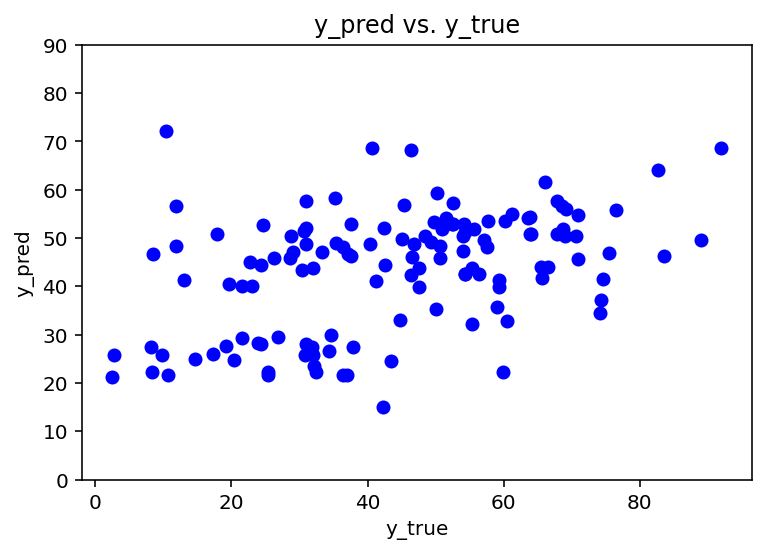

In [24]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [25]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_ANN_Opt.csv', index = False, header=True)